# CES Final Project, 
### Devan Harlan, Fall '24

An attempt to model periodicity of glacial earthquakes in western Greenland from 1993-2023. 
Hypotheses: There is a correlation with ocean circulation (NAO or AMOC) and which may be recorded in SST. 
Attempt to model SST periodicity from NOAA monthly mean data and compare models.


In [3]:
#packages
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from scipy import optimize
%matplotlib inline

In [4]:
quakeData = pd.read_csv('data/GLEA_1993_2023_HC.tsv', sep='\t')
quakeData.head()

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A


In [5]:
quakeData['date'] = pd.to_datetime(quakeData[['year', 'month', 'day', 'hour', 'minute', 'second']])
#quakeData['dateToOrdinal'] = quakeData['date'].map(pd.Timestamp.toordinal)
quakeData.set_index('date')
quakeData

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname,date
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A,1993-01-24 10:21:04
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A,1993-07-26 12:26:40
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A,1993-08-05 02:00:40
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A,1993-10-19 21:10:00
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A,1993-11-30 07:33:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,SWEM,C,2023,11,11,5,20,24.0,73.00,-55.00,10.0,0.0,4.8,WESTERNGREENLAND,202311110520A,2023-11-11 05:20:24
1021,SWEM,B,2023,11,20,16,43,36.0,76.00,-62.00,10.0,0.0,5.0,WESTERNGREENLAND,202311201643A,2023-11-20 16:43:36
1022,SWEM,A,2023,11,20,16,48,40.0,76.25,-61.25,10.0,0.0,5.0,WESTERNGREENLAND,202311201648A,2023-11-20 16:48:40
1023,SWEM,C,2023,11,24,2,52,56.0,65.50,-40.50,10.0,0.0,4.7,WESTERNGREENLAND,202311240252A,2023-11-24 02:52:56


<function matplotlib.pyplot.show(close=None, block=None)>

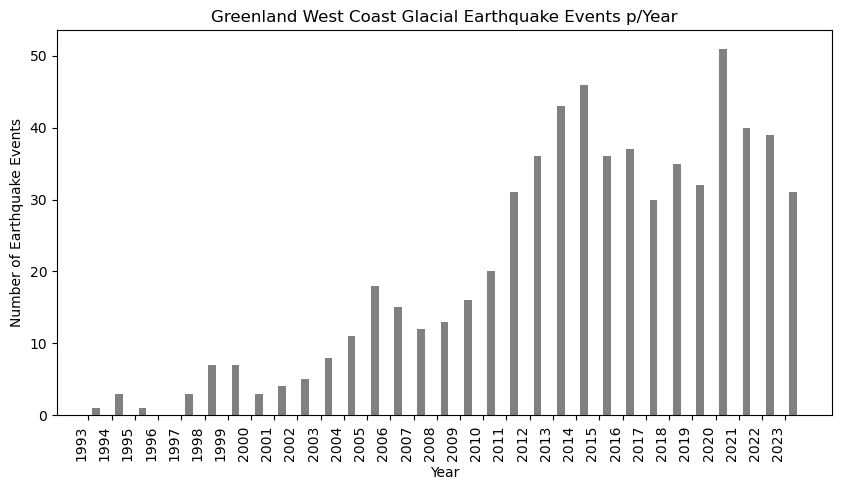

In [6]:
# Plot total count of earthquakes per year
grp_YearCoast = quakeData.groupby(['year', 'region']).size().unstack(fill_value=0)

bar_width = 1/3
years = grp_YearCoast.index

west_grp = grp_YearCoast['WESTERNGREENLAND']
north_grp = grp_YearCoast['BAFFINBAY']
northwest_grp = pd.concat([west_grp, north_grp]).groupby('year').sum()
#print(northwest_grp)
# The x locations for the groups
x = np.arange(len(years))

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the West Coast bars
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
plt.show

In [77]:
# exponential model

def expfunc(x, a, b, c):
    y = a + b*x**c
    return y

# Get the model parameters
mest_exp = optimize.curve_fit(expfunc, xdata = x, ydata=eventsDf.iloc[:, 1])[0]
print(mest_exp)
resultsExp = expfunc(x, mest_exp[0], mest_exp[1], mest_exp[2])

[-2.27775782  1.18865062  1.08290833]


<function matplotlib.pyplot.show(close=None, block=None)>

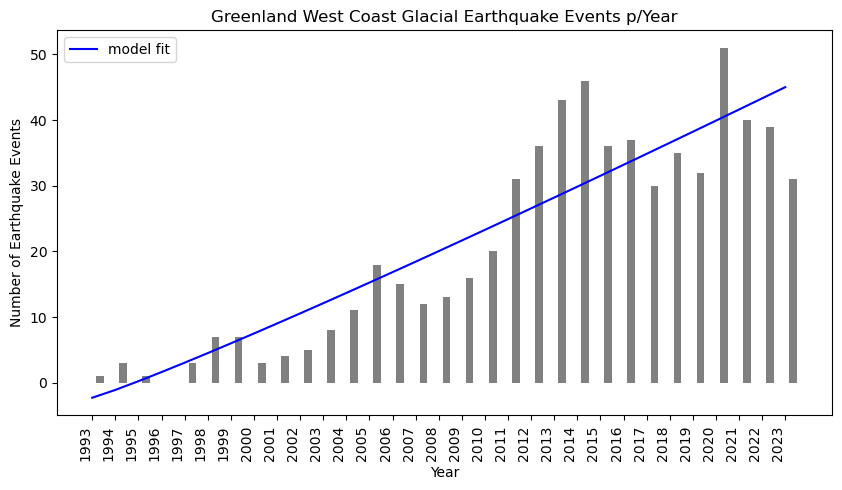

In [88]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultsExp, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

In [91]:
# sin model

def sinfunc(x, a, b, c):
    # a = amplitude coefficient
    # b = wave frequency
    # c = wave phase
    y = a*x * np.sin(x*b+c)
    return y

def sinfuncExp(x, a, b, c, d): # Py solve can't handle this!
    # a = amplitude
    # b = wave frequency
    # c = wave phase
    # d = amplitude expon. increase
    y = a*x**d * np.sin(x*b+c)
    return y

# Get the model parameters
mest_sin = optimize.curve_fit(sinfunc, xdata = x, ydata=eventsDf.iloc[:, 1])[0]
print(mest_sin)
resultSin = sinfunc(x, mest_sin[0], mest_sin[1], mest_sin[2])

[-0.61618195  0.75263302  8.61256546]


<function matplotlib.pyplot.show(close=None, block=None)>

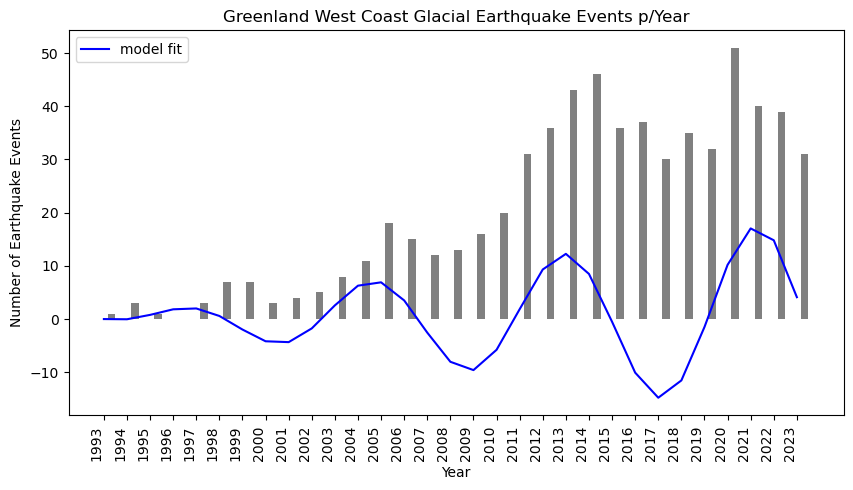

In [92]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultSin, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

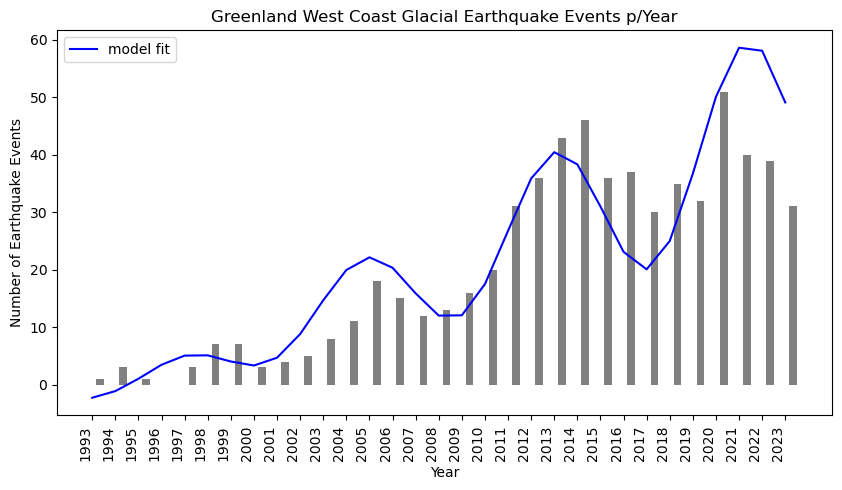

In [90]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultsExp+resultSin, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


1.5942104 0.97999996 7.3399997


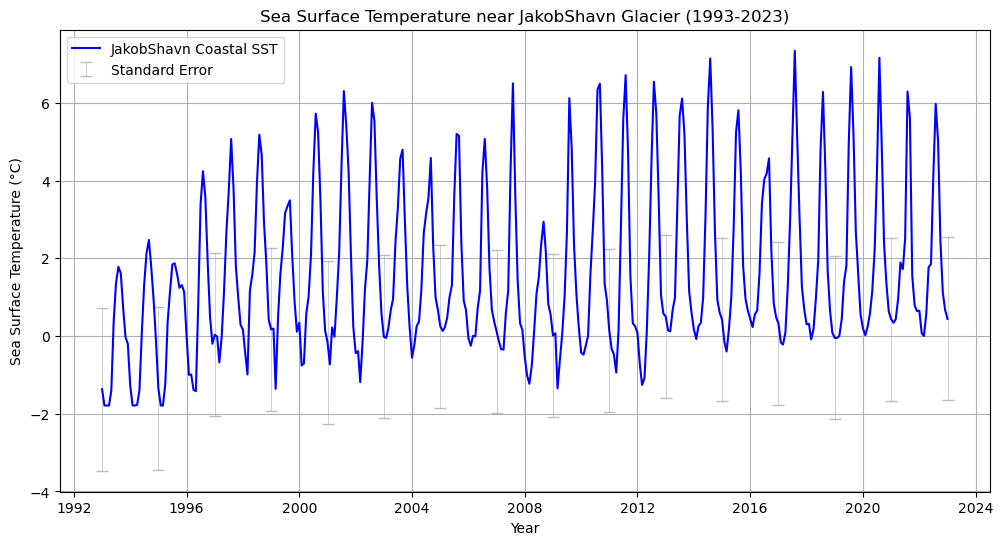

In [7]:
# Get Monthly mean sea surface data:

# Define the file path
file_path = "data/sst.mnmean.nc"
dataset = xr.open_dataset(file_path)

# sel variables
sst = dataset['sst']  # Access the 'sst' variable directly as a DataArray

# Select the nearest grid point to the specified coordinates
lat = 69.0  # Jakobshavn Glacier
lon = -52.0 + 360  # Convert W longitude to 0-360 scale
lat1 = 66.3  # Approximate latitude for Helheim Glacier
lon1 = -38.2 + 360  # Convert W longitude to 0-360 scale
lat2 = 68.6  # Kangerlussuaq Glacier
lon2 = -33.0 + 360  # Convert W longitude to 0-360 scale
sst_west = sst.sel(lat=lat, lon=lon, method='nearest')  # Use the nearest flag

# time range
start_date = '1993-01-01'
end_date = '2023-01-01'
sst_west = sst_west.sel(time=slice(start_date, end_date))

# Convert to NumPy
sst_mmean_values = sst_west.values  # Extract SST values - Remembers each alue is a monthly mean!
time_index = pd.to_datetime(sst_west['time'].values)  # Convert time to pandas datetime

#print(sst_westYear)
#print(sst_west.values)
#print(sst_mmean_values)
# Plots

#mean standard error
d_mean = (np.mean(sst_mmean_values))
d_med = (np.median(sst_mmean_values))
d_max = (np.max(sst_mmean_values))
d_mean_1d = d_mean.reshape(-1)
d_err = (np.std(sst_mmean_values) * np.ones_like(sst_mmean_values))
d_err_1d = d_err.reshape(-1)
d_obs_1d = sst_mmean_values.reshape(-1)

print(d_mean, d_med, d_max)

plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mmean_values, label='JakobShavn Coastal SST', color='blue')
plt.errorbar(time_index, d_obs_1d, yerr=d_err_1d, label='Standard Error', color="tab:orange", alpha=0.5, ecolor='gray', linewidth=0, elinewidth=0.5, errorevery=24, capsize=4, fillstyle='full', zorder=0)

plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near JakobShavn Glacier (1993-2023)')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('figures/SST-EastGreenland_1993-2023.png', bbox_inches='tight')


[1.78, 2.47, 1.87, 4.24, 5.0699997, 5.18, 3.49, 5.72, 6.2999997, 6.0, 4.79, 4.58, 5.2, 5.0699997, 6.5, 2.9399998, 6.12, 6.49, 6.71, 6.54, 6.1099997, 7.14, 5.81, 4.5699997, 7.3399997, 6.2799997, 6.92, 7.16, 6.29, 5.97]


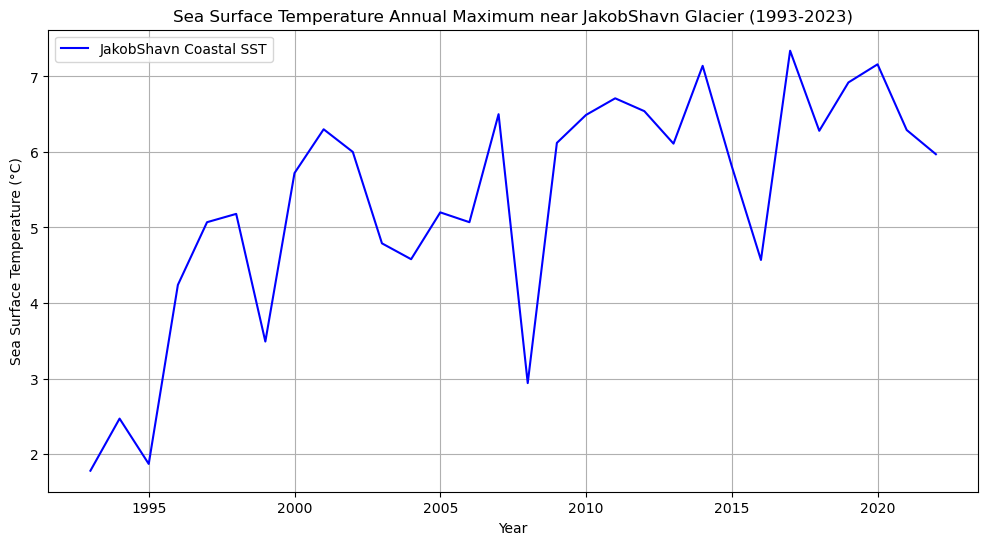

In [8]:
# NM you just need to get the maximum month for each year!

# Group the data by year
sst_westYearsGrp = sst_west.groupby("time.year")

maxVals = []
years = list(range(1993, 2023))

# I'm sure there's a way to do this w/out a for loop but I'm old school:
for year in years:
    ymax = sst_westYearsGrp[year].values.max()
    maxVals.append(ymax)

print(maxVals)
plt.figure(figsize=(12, 6))
plt.plot(years, maxVals, label='JakobShavn Coastal SST', color='blue')

plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature Annual Maximum near JakobShavn Glacier (1993-2023)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# exponential model
x = np.arange(len(years))
def expfunc(x, a, b, c):
    y = a + b*x**c
    return y

# Get the model parameters
mest_exp = optimize.curve_fit(expfunc, xdata = x, ydata=maxVals)[0]
print(mest_exp)
resultExp = expfunc(x, mest_exp[0], mest_exp[1], mest_exp[2])
print(mest_exp)

# sin model
def sinfunc(x, a, b, c):
    # a = amplitude coefficient
    # b = wave frequency
    # c = wave phase
    y = a*x * np.sin(x*b+c)
    return y

# Get the model parameters

mest_sin = optimize.curve_fit(sinfunc, xdata = x, ydata=maxVals)[0]
print(mest_sin)
resultSin = sinfunc(x, mest_sin[0], mest_sin[1], mest_sin[2])

[1.49754128 1.67520193 0.33880569]
[1.49754128 1.67520193 0.33880569]
[-0.09296157  0.62582676 12.9170373 ]


<function matplotlib.pyplot.show(close=None, block=None)>

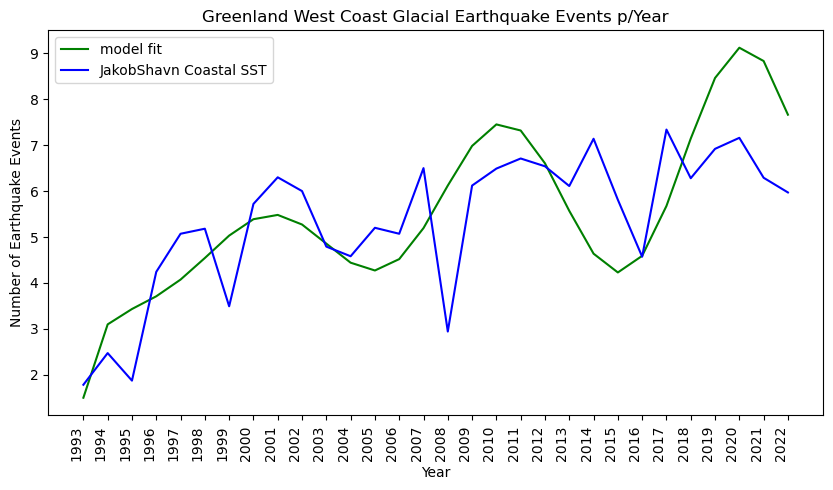

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x, resultExp+resultSin, 'g-', label="model fit")
plt.plot(x, maxVals, label='JakobShavn Coastal SST', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

## Conclusion

Models do not quite match. The model paramter for periodicity of the waves are close: 0.75 for the eartquakes ande 0.626 for the surface temperature change.
Requires further work. Also additional research suggest that sea *subsurface temperature (which is warmer) is more responsible for ice-mass loss.

